# SELECCIÓN DE ZONA APTA PARA ......


In [26]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (10, 8)


In [27]:
# --- File paths  ---
root_folder = r"/notebooks"  # la ruta de ubicación
#root_folder=r"/Users/macbook/Library/CloudStorage/OneDrive-UniversidadNacionaldeColombia/1_Periodos_Asignaturas/Cursos_2025_1/Programacion SIG/Talleres"

SHAPE_MUN = root_folder+'/municipios_colombia.shp'
EVA_CSV   = root_folder+'/Evaluaciones_Agropecuarias_Municipales_EVA.csv'
EST_CSV   = root_folder+'/Catalogo_Estaciones_IDEAM.csv'
SHAPE_VIAS= root_folder+'/Workshop_6/vias/vias.shp'
SHAPE_RUNAP=root_folder+'/Workshop_6/latest/runap.shp'


In [28]:
# Municipalities → GeoDataFrame 
gdf_mun = gpd.read_file(SHAPE_MUN).to_crs(epsg=9377)

# Municipalities → GeoDataFrame 
gdf_vias = gpd.read_file(SHAPE_VIAS).to_crs(epsg=9377)

# Municipalities → GeoDataFrame 
gdf_runap = gpd.read_file(SHAPE_RUNAP).to_crs(epsg=9377)


# EVA table, rename code column
eva = (pd.read_csv(EVA_CSV)
         .rename(columns={"CÓD. MUN.": "cod_mun"}))
eva["CULTIVO"] = eva["CULTIVO"].astype(str)      # ensure string

# IDEAM catalogue → GeoDataFrame (clean "(lat, lon)")
df_est = pd.read_csv(EST_CSV, encoding="utf-8", sep=',')
coords = (df_est["Ubicación"]
            .str.strip("()")
            .str.split(",", expand=True)
            .astype(float))
df_est["lat"], df_est["lon"] = coords[0], coords[1]

print(df_est.columns.tolist())  # Asegúrate de que se llama exactamente 'Ubicación'
print(df_est["Ubicación"].head())


gdf_est = gpd.GeoDataFrame(
    df_est,
    geometry=gpd.points_from_xy(df_est["lon"], df_est["lat"]),
    crs="EPSG:4326"
).to_crs(epsg=9377)

print(f"{len(gdf_mun):,} municipalities • {len(gdf_est):,} stations • "
      f"{len(eva):,} EVA rows")


#Homogenise municipalities codes
gdf_mun["MPIO_CCDGO"] = gdf_mun["MPIO_CCDGO"].astype(str).str.zfill(5)
eva["cod_mun"]        = eva["cod_mun"].astype(str).str.zfill(5)

['Codigo', 'Nombre', 'Categoria', 'Estado', 'Departamento', 'Municipio', 'Ubicación', 'Altitud', 'Fecha_instalacion', 'Fecha_suspension', 'Corriente', 'lat', 'lon']
0     (0.81378611, -77.66197778)
1     (0.93030556, -77.49119444)
2     (1.07061111, -77.63688889)
3     (1.08288889, -76.66711111)
4    (-3.78030556, -70.36263889)
Name: Ubicación, dtype: object
1,122 municipalities • 8,973 stations • 206,068 EVA rows


In [9]:
gdf_est

,Codigo,Nombre,Categoria,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Corriente,lat,lon,geometry
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)",2582,2016-11-15,NaN,Guaitara,0.813786,-77.661978,POINT (4480921.418 1648261.853)
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)",2450,2005-12-10,NaN,Guaitara,0.930306,-77.491194,POINT (4499992.408 1661153.867)
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)",3120,2004-03-01,NaN,Guaitara,1.070611,-77.636889,POINT (4483759.028 1676727.973)
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaN,Guaitara,1.082889,-76.667111,POINT (4591897.597 1677940.612)
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaN,Amazonas,-3.780306,-70.362639,POINT (5292824.016 1139928.729)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,4401700167,NIVEL SANGOYACO GARGANTA,Limnimétrica,Activa,Putumayo,Mocoa,"(1.15872222, -76.67080556)",761,2020-02-25,NaN,Mocoa,1.158722,-76.670806,POINT (4591496.422 1686336.979)
8969,4401700168,NIVEL MULATO PALMERAS,Limnimétrica,Activa,Putumayo,Mocoa,"(1.15638889, -76.69027778)",966,2020-02-25,NaN,Mocoa,1.156389,-76.690278,POINT (4589326.12 1686081.462)
8970,4401700172,NIVEL MOCOA PISCIKART,Limnimétrica,Activa,Putumayo,Villagarzón,"(1.03964167, -76.61091944)",408,2020-02-25,NaN,Mocoa,1.039642,-76.610919,POINT (4598153.817 1673145.302)
8971,4401700173,NIVEL RUMIYACO LAGARTO,Limnimétrica,Activa,Putumayo,Mocoa,"(1.119225, -76.67045)",647,2020-02-25,NaN,Mocoa,1.119225,-76.670450,POINT (4591530.468 1681964.004)


In [29]:
# Renombrar la columna para alinear con la clave de unión
eva = eva.rename(columns={'cod_mun': 'MPIO'})
print(eva.head())

# Asegurar que los códigos estén en formato de cadena y con ceros a la izquierda
eva['MPIO'] = eva['MPIO'].astype(str).str.zfill(5)
gdf_mun['MPIO_CDPMP'] = gdf_mun['MPIO_CDPMP'].astype(str).str.zfill(5)

# Realizar el join entre los datos espaciales de municipios y las evaluaciones agropecuarias
muni_eva = gdf_mun.merge(
    eva,
    how='left',                 # 'left' mantiene todos los municipios (incluso si no hay coincidencia con EVA)
    left_on='MPIO_CDPMP',       # Clave de unión en el GeoDataFrame (municipios)
    right_on='MPIO',            # Clave de unión en el DataFrame de EVA
    indicator=True,             # Crear una columna '_merge' para indicar el tipo de coincidencia
    validate='one_to_many',     # Validar que cada municipio en muni tenga como máximo una coincidencia en EVA
    suffixes=('', '_eva')       # Añadir el sufijo '_eva' a las columnas duplicadas
)

# Imprimir la cantidad de coincidencias
print(muni_eva['_merge'].value_counts())

# Mostrar las columnas después de la fusión
print(muni_eva.columns.tolist())

   CÓD. \nDEP.        DEPARTAMENTO   MPIO   MUNICIPIO GRUPO \nDE CULTIVO  \
0           15              BOYACA  15114    BUSBANZA         HORTALIZAS   
1           25        CUNDINAMARCA  25754      SOACHA         HORTALIZAS   
2           25        CUNDINAMARCA  25214        COTA         HORTALIZAS   
3           54  NORTE DE SANTANDER  54405  LOS PATIOS         HORTALIZAS   
4           54  NORTE DE SANTANDER  54518    PAMPLONA         HORTALIZAS   

  SUBGRUPO \nDE CULTIVO CULTIVO DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  \
0                ACELGA  ACELGA                                        ACELGA   
1                ACELGA  ACELGA                                        ACELGA   
2                ACELGA  ACELGA                                        ACELGA   
3                ACELGA  ACELGA                                        ACELGA   
4                ACELGA  ACELGA                                        ACELGA   

    AÑO PERIODO  Área Sembrada\n(ha)  Área Cosechada\n(h

Filas conservadas para CAFE en 2018: 601
                  MPIO_CNMBR CULTIVO     AÑO
57                 FLORENCIA    CAFE  2018.0
514              EL DONCELLO    CAFE  2018.0
667                EL PAUJÍL    CAFE  2018.0
793             LA MONTAÑITA    CAFE  2018.0
1614  SAN VICENTE DEL CAGUÁN    CAFE  2018.0

🏆 Top 5 municipios con mayor producción de café (toneladas):
            MPIO_CNMBR  Producción\n(t)
171120        PITALITO          17236.0
180527         ACEVEDO          13472.0
59374   CIUDAD BOLÍVAR          11439.0
9882          EL TAMBO          11315.0
71338           SALGAR          11057.0


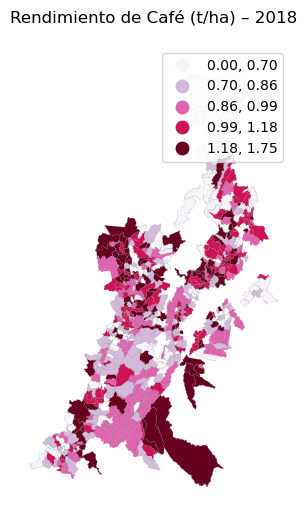

In [30]:

# Parámetros de cultivo y año
selected_year = 2018
crop_name     = 'CAFE'  # Asegúrate que en tu CSV esté sin tilde

# Filtrar por cultivo y año
cafe = (
    muni_eva
    .query("CULTIVO == @crop_name and AÑO == @selected_year")
    .copy()
)

# Verificación
print(f"Filas conservadas para {crop_name} en {selected_year}: {len(cafe):,}")
print(cafe[['MPIO_CNMBR', 'CULTIVO', 'AÑO']].head())

# Calcular rendimiento (t/ha)
cafe['yield_t_ha'] = (
    cafe['Producción\n(t)'] / cafe['Área Sembrada\n(ha)']
)

# Eliminar filas con valores nulos
cafe_map = cafe.dropna(subset=['yield_t_ha'])

# ▶ Mostrar los 5 municipios con mayor producción total de café
top5_produccion = (
    cafe_map[['MPIO_CNMBR', 'Producción\n(t)']]
    .sort_values(by='Producción\n(t)', ascending=False)
    .head(5)
)

print("\n🏆 Top 5 municipios con mayor producción de café (toneladas):")
print(top5_produccion)

# --- PARTE 3: Visualización del rendimiento --------------------------------

ax = cafe_map.plot(
    column='yield_t_ha',
    scheme='Quantiles', k=5,
    cmap='PuRd',
    legend=True,
    figsize=(6, 6),
    edgecolor='grey', linewidth=0.1
)
ax.set_title(f'Rendimiento de Café (t/ha) – {selected_year}')
ax.set_axis_off()
plt.show()

Head of re-projected station GeoDataFrame:


,Codigo,Nombre,Categoria,Estado,Departamento,Municipio,Ubicación,Altitud,Fecha_instalacion,Fecha_suspension,Corriente,lat,lon,geometry
0,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Activa,Nariño,Ipiales,"(0.81378611, -77.66197778)",2582,2016-11-15,NaN,Guaitara,0.813786,-77.661978,POINT (4480921.418 1648261.853)
1,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Activa,Nariño,Contadero,"(0.93030556, -77.49119444)",2450,2005-12-10,NaN,Guaitara,0.930306,-77.491194,POINT (4499992.408 1661153.867)
2,52055220,EL PARAISO - AUT [52055220],Climática Principal,Activa,Nariño,Túquerres,"(1.07061111, -77.63688889)",3120,2004-03-01,NaN,Guaitara,1.070611,-77.636889,POINT (4483759.028 1676727.973)
3,44015070,EL PEPINO - AUT [44015070],Climática Principal,Activa,Putumayo,Mocoa,"(1.08288889, -76.66711111)",760,2005-11-11,NaN,Guaitara,1.082889,-76.667111,POINT (4591897.597 1677940.612)
4,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Activa,Amazonas,Puerto Nariño,"(-3.78030556, -70.36263889)",158,2005-07-19,NaN,Amazonas,-3.780306,-70.362639,POINT (5292824.016 1139928.729)


gdf_mun columns Index(['DPTO_CCDGO', 'MPIO_CCDGO', 'MPIO_CNMBR', 'MPIO_CDPMP', 'VERSION',
       'AREA', 'LATITUD', 'LONGITUD', 'STCTNENCUE', 'STP3_1_SI', 'STP3_2_NO',
       'STP3A_RI', 'STP3B_TCN', 'STP4_1_SI', 'STP4_2_NO', 'STP9_1_USO',
       'STP9_2_USO', 'STP9_3_USO', 'STP9_4_USO', 'STP9_2_1_M', 'STP9_2_2_M',
       'STP9_2_3_M', 'STP9_2_4_M', 'STP9_2_9_M', 'STP9_3_1_N', 'STP9_3_2_N',
       'STP9_3_3_N', 'STP9_3_4_N', 'STP9_3_5_N', 'STP9_3_6_N', 'STP9_3_7_N',
       'STP9_3_8_N', 'STP9_3_9_N', 'STP9_3_10', 'STP9_3_99', 'STVIVIENDA',
       'STP14_1_TI', 'STP14_2_TI', 'STP14_3_TI', 'STP14_4_TI', 'STP14_5_TI',
       'STP14_6_TI', 'STP15_1_OC', 'STP15_2_OC', 'STP15_3_OC', 'STP15_4_OC',
       'TSP16_HOG', 'STP19_EC_1', 'STP19_ES_2', 'STP19_EE_1', 'STP19_EE_2',
       'STP19_EE_3', 'STP19_EE_4', 'STP19_EE_5', 'STP19_EE_6', 'STP19_EE_9',
       'STP19_ACU1', 'STP19_ACU2', 'STP19_ALC1', 'STP19_ALC2', 'STP19_GAS1',
       'STP19_GAS2', 'STP19_GAS9', 'STP19_REC1', 'STP19_REC2', 'STP19_

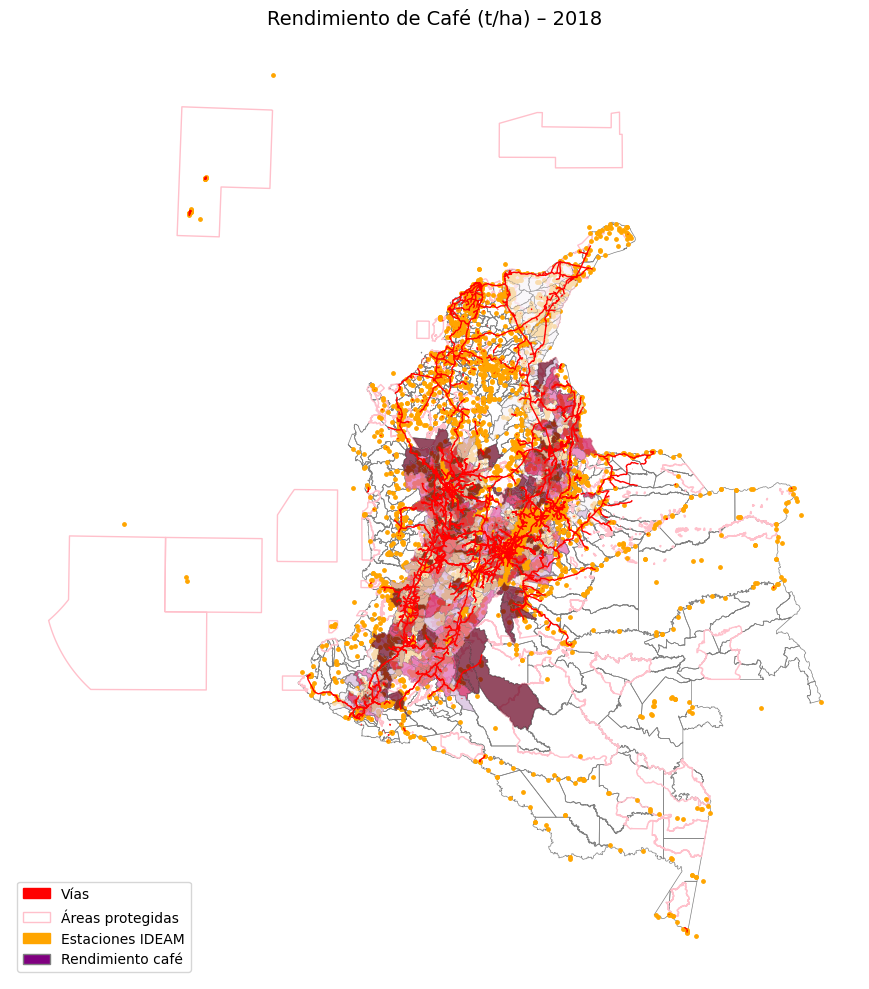

In [31]:
# ── Quick checks y carga del mapa base ─────────────────────────────────────
print("Head of re-projected station GeoDataFrame:")
display(gdf_est.head())
print("gdf_mun columns", gdf_mun.columns)

# Crear figura y eje
fig, ax = plt.subplots(figsize=(10, 10))

# Mapa base: Municipios, vías, áreas protegidas, estaciones
gdf_mun.plot(ax=ax, color="none", edgecolor="grey", linewidth=0.5)
gdf_vias.plot(ax=ax, edgecolor="red", linewidth=1, label="Vías")
gdf_runap.plot(ax=ax, color="none", edgecolor="pink", linewidth=1, label="Áreas protegidas")
gdf_est.plot(ax=ax, color="orange", markersize=6, label="Estaciones IDEAM")

# ── Café: Filtrar por cultivo y año ────────────────────────────────────────
selected_year = 2018
crop_name     = 'CAFE'

cafe = (
    muni_eva
    .query("CULTIVO == @crop_name and AÑO == @selected_year")
    .copy()
)

print(f"Filas conservadas para {crop_name} en {selected_year}: {len(cafe):,}")
print(cafe[['MPIO_CNMBR', 'CULTIVO', 'AÑO']].head())

# Calcular rendimiento
cafe['yield_t_ha'] = (
    cafe['Producción\n(t)'] / cafe['Área Sembrada\n(ha)']
)

# Eliminar nulos
cafe_map = cafe.dropna(subset=['yield_t_ha'])

# Top 5 municipios con mayor producción
top5_produccion = (
    cafe_map[['MPIO_CNMBR', 'Producción\n(t)']]
    .sort_values(by='Producción\n(t)', ascending=False)
    .head(5)
)
print("\n🏆 Top 5 municipios con mayor producción de café (toneladas):")
print(top5_produccion)

# ── Visualización del rendimiento sobre el mismo ax ────────────────────────
cafe_map.plot(
    ax=ax,
    column='yield_t_ha',
    scheme='Quantiles', k=5,
    cmap='PuRd',
    legend=True,
    edgecolor='grey', linewidth=0.2,
    alpha=0.7  # Transparencia para ver capas inferiores
)

# Crear parches manuales para la leyenda
legend_elements = [
    mpatches.Patch(color='red', label='Vías'),
    mpatches.Patch(edgecolor='pink', facecolor='none', label='Áreas protegidas'),
    mpatches.Patch(color='orange', label='Estaciones IDEAM'),
    mpatches.Patch(facecolor='purple', edgecolor='grey', label='Rendimiento café')
]

# Título y ajustes finales
ax.set_title(f'Rendimiento de Café (t/ha) – {selected_year}', fontsize=14)
ax.set_axis_off()
plt.legend(handles=legend_elements, loc='lower left')
plt.tight_layout()
plt.show()

Contando estaciones por municipio...

Primeras 5 filas del conteo:
  MPIO_CCDGO  num_estaciones
0      00001            1269
1      00002               9
2      00003              34
3      00004               2
4      00006              28
Top 5 municipios con más estaciones:
    MPIO_CCDGO  num_estaciones
0        00001            1269
326      00520              96
380      00615              76
429      00686              75
7        00013              72


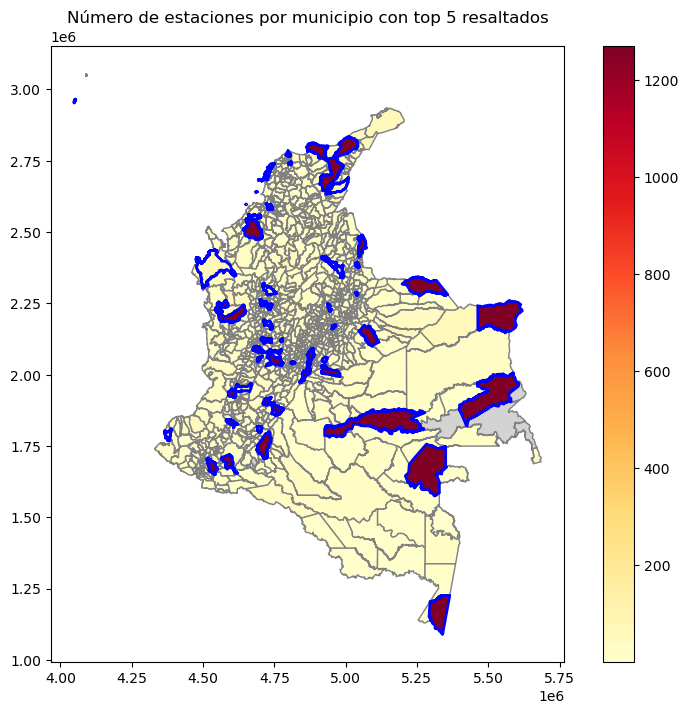


Información detallada de los top 5 municipios y sus uniones espaciales:

• FLORENCIA (Código: 00001): 1269 estaciones
  - Estaciones que intersectan: 20
  - Vías que intersectan: 9
  - Áreas protegidas que intersectan: 24

• PALMIRA (Código: 00520): 96 estaciones
  - Estaciones que intersectan: 92
  - Vías que intersectan: 129
  - Áreas protegidas que intersectan: 17

• RIONEGRO (Código: 00615): 76 estaciones
  - Estaciones que intersectan: 23
  - Vías que intersectan: 46
  - Áreas protegidas que intersectan: 5

• SANTA ROSA DE OSOS (Código: 00686): 75 estaciones
  - Estaciones que intersectan: 39
  - Vías que intersectan: 14
  - Áreas protegidas que intersectan: 6

• AGUADAS (Código: 00013): 72 estaciones
  - Estaciones que intersectan: 14
  - Vías que intersectan: 5
  - Áreas protegidas que intersectan: 3


In [35]:
# Realizar el join espacial correctamente
est_muni = gpd.sjoin(gdf_est, gdf_mun, how="left", predicate="within")

print("Contando estaciones por municipio...")
est_por_muni = est_muni.groupby("MPIO_CCDGO").size()

# Convertir la Serie a DataFrame y renombrar columna
conteo_df = est_por_muni.reset_index(name="num_estaciones")
print("\nPrimeras 5 filas del conteo:")
print(conteo_df.head())

# Ordenar por num_estaciones de mayor a menor y tomar los primeros 5
top5 = conteo_df.sort_values(by="num_estaciones", ascending=False).head(5)
print("Top 5 municipios con más estaciones:")
print(top5)

# Unir datos al GeoDataFrame de municipios
gdf_mun_est = gdf_mun.merge(
    conteo_df,
    left_on="MPIO_CCDGO",
    right_on="MPIO_CCDGO",
    how="left"
)

# Añadir columna booleana para resaltar top 5
gdf_mun_est["highlight"] = gdf_mun_est["MPIO_CCDGO"].isin(top5["MPIO_CCDGO"])

# Graficar mapa temático con resaltado
fig, ax = plt.subplots(figsize=(10, 8))
gdf_mun_est.plot(
    column="num_estaciones",
    cmap="YlOrRd",
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey"},
    edgecolor="grey"
)
highlight_munis = gdf_mun_est[gdf_mun_est["highlight"]]
highlight_munis.plot(
    ax=ax,
    facecolor="none",
    edgecolor="blue",
    linewidth=2
)
plt.title("Número de estaciones por municipio con top 5 resaltados")
plt.show()

# --- Uniones booleanas para los top 5 municipios ---
print("\nInformación detallada de los top 5 municipios y sus uniones espaciales:")
for idx, row in top5.iterrows():
    cod_mun = row["MPIO_CCDGO"]
    nombre = gdf_mun.loc[gdf_mun["MPIO_CCDGO"] == cod_mun, "MPIO_CNMBR"].values[0]
    muni_geom = gdf_mun.loc[gdf_mun["MPIO_CCDGO"] == cod_mun].geometry.iloc[0]
    
    # Máscaras booleanas espaciales
    estaciones_bool = gdf_est.intersects(muni_geom)
    vias_bool = gdf_vias.intersects(muni_geom)
    runap_bool = gdf_runap.intersects(muni_geom)
    
    print(f"\n• {nombre} (Código: {cod_mun}): {row['num_estaciones']} estaciones")
    print(f"  - Estaciones que intersectan: {estaciones_bool.sum()}")
    print(f"  - Vías que intersectan: {vias_bool.sum()}")
    print(f"  - Áreas protegidas que intersectan: {runap_bool.sum()}")

   
# Mostrar información detallada de los municipios
# print("\nInformación detallada de los top 5 municipios:")
#for idx, row in gdf_top5_final.iterrows():
#    print(f"• {row.get('MPIO_CNMBR', 'N/A')} (Código: {row['MPIO_CCDGO']}): {row['num_estaciones']} estaciones")

In [45]:
# --- Información detallada del municipio de Pitalito (Código: 41551) ---
codigo_pitalito = "41551"
print (pitalito)
if codigo_pitalito in est_muni["MPIO_CCDGO"].values:
    nombre_pitalito = est_muni.loc[
        gdf_mun["MPIO_CCDGO"] == codigo_pitalito, "MPIO_CNMBR"
    ].values[0]
    
    geom_pitalito = est_muni.loc[
        est_muni["MPIO_CCDGO"] == codigo_pitalito
    ].geometry.iloc[0]
    
    estaciones_bool = gdf_est.intersects(geom_pitalito)
    vias_bool = gdf_vias.intersects(geom_pitalito)
    runap_bool = gdf_runap.intersects(geom_pitalito)

    num_estaciones = est_por_muni.get(codigo_pitalito, 0)

    print(f"\n🌟 Información espacial del municipio de {nombre_pitalito} (Código: {codigo_pitalito}):")
    print(f"  - Número total de estaciones: {num_estaciones}")
    print(f"  - Estaciones que intersectan: {estaciones_bool.sum()}")
    print(f"  - Vías que intersectan: {vias_bool.sum()}")
    print(f"  - Áreas protegidas que intersectan: {runap_bool.sum()}")
else:
    print("\n⚠️ El municipio de Pitalito (código 41551) no se encuentra en el GeoDataFrame.")

NameError: name 'pitalito' is not defined

In [46]:
# 2. GeoDataFrame de los municipios de huila
gdf_huila = gdf_mun[gdf_mun["DPTO_CCDGO"] == "41"].copy()

# 3. GeoDataFrame con el borde del departamento de Huila (disuelto)
huila_borde = gdf_antioquia.dissolve(by="DPTO_CCDGO")

# 4. GeoDataFrame con el borde de toda Colombia (disuelto)
colombia_borde = gdf_mun.dissolve()




# Filtrar el GeoDataFrame para el municipio de PITALITO usando su código
pitalito_muni = cafe[gdf_mun["MPIO_CDPMP"] == "41551"].copy()

# Crear máscaras booleanas para elementos que intersectan con PITALITO
pitalito_stations = gdf_est[gdf_est.intersects(pitalito_muni.geometry.iloc[0])]
pitalito_vias = gdf_vias[gdf_vias.intersects(pitalito_muni.geometry.iloc[0])]
pitalito_runap = gdf_runap[gdf_runap.intersects(pitalito_muni.geometry.iloc[0])]

#cortar la via
cort_via = gpd.clip(pitalito_vias, pitalito_muni)
# Crear el mapa de acercamiento
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar elementos
pitalito_muni.plot(ax=ax, color="lightgray", edgecolor="black")  # Fondo del municipio
pitalito_stations.plot(ax=ax, color="green", markersize=50, marker="^", label="Estaciones (20)")
cort_via.plot(ax=ax, color="red", linewidth=3, label="Vías (9)")
pitalito_runap.plot(ax=ax, color="blue", alpha=0.5, edgecolor="navy", label="Áreas protegidas (24)")

colombia_borde.boundary.plot(ax=ax, edgecolor="gray", linewidth=1, label="Colombia disuelta")
gdf_huila.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.5, label="Municipios Huila")
huila_borde.boundary.plot(ax=ax, edgecolor="magenta", linewidth=2, label="Huila disuelta")

# Añadir detalles
ctx.add_basemap(ax, crs=srosaoso_muni.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.title("Vista general de PITALITO (Código_MPIO_CDPMP: 41551)\nEstaciones, vías y áreas protegidas", fontsize=14, pad=20)
plt.legend(loc="upper right", fontsize=10)
ax.set_axis_on()  # Activa los ejes
ax.ticklabel_format(useOffset=False)  # Desactiva notación científica si aplica
ax.set_xlabel("Coordenada Este (X)")
ax.set_ylabel("Coordenada Norte (Y)")

# Añadir detalles
ctx.add_basemap(ax, crs=pitalito_muni.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.title("Acercamiento de PITALITO (Código_MPIO_CDPMP: 5686)\nEstaciones, vías y áreas protegidas", fontsize=14, pad=20)
plt.legend(loc="upper right", fontsize=10)

# Activar ejes con coordenadas
ax.set_axis_on()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("Coordenada Este (X)")
ax.set_ylabel("Coordenada Norte (Y)")

# Añadir anotación con información del municipio
info_text = (
    "PITALITO (Código: 5686)\n"
    "• Estaciones: 39\n"
    "• Vías principales: 14\n"
    "• Áreas protegidas: 6"
)
plt.annotate(info_text, 
             xy=(0.05, 0.15), 
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.show()

NameError: name 'gdf_antioquia' is not defined

/tmp/ipykernel_51/1562405466.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize=10)
/tmp/ipykernel_51/1562405466.py:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc="upper right", fontsize=10)


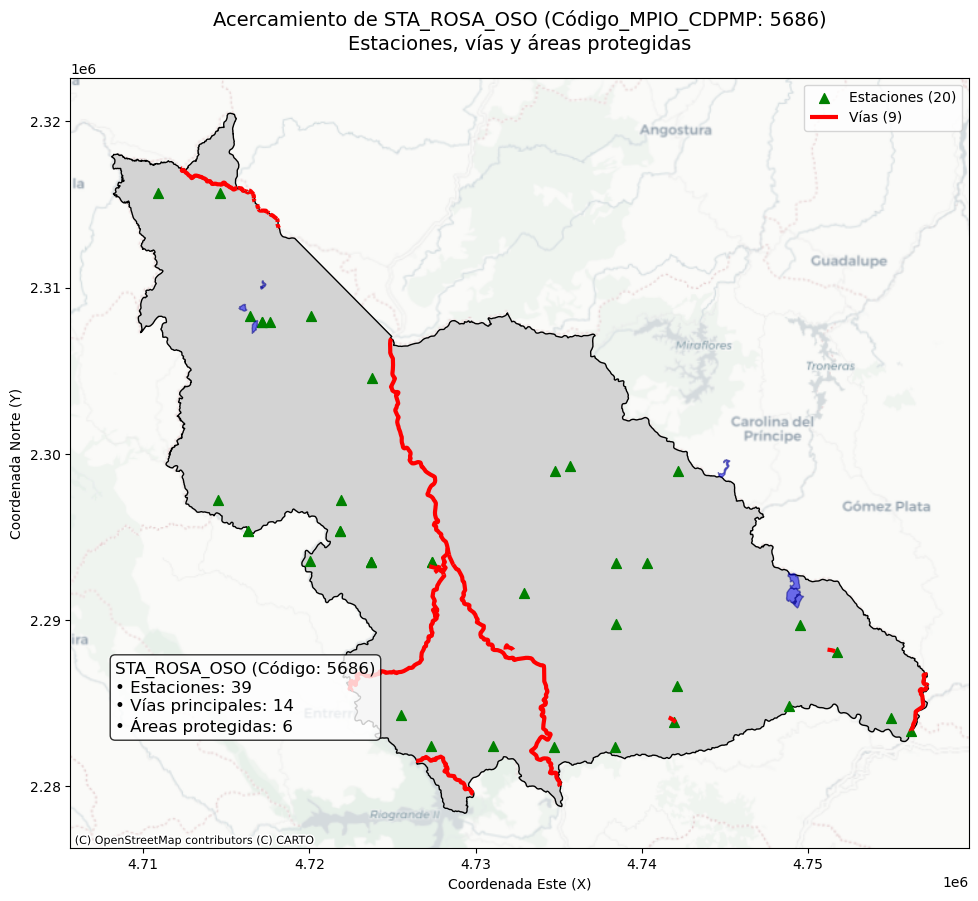

In [97]:
# Filtrar el GeoDataFrame para el municipio de STA_ROSA_OSO usando su código
srosaoso_muni = gdf_mun[gdf_mun["MPIO_CDPMP"] == "5686"].copy()

# Crear máscaras booleanas para elementos que intersectan con STA_ROSA_OSO
srosaoso_stations = gdf_est[gdf_est.intersects(srosaoso_muni.geometry.iloc[0])]
srosaoso_vias = gdf_vias[gdf_vias.intersects(srosaoso_muni.geometry.iloc[0])]
srosaoso_runap = gdf_runap[gdf_runap.intersects(srosaoso_muni.geometry.iloc[0])]

#cortar la via
nws_groceries = gpd.clip(srosaoso_vias, srosaoso_muni)
# Crear el mapa de acercamiento
fig, ax = plt.subplots(figsize=(12, 10))

# Graficar elementos
srosaoso_muni.plot(ax=ax, color="lightgray", edgecolor="black")  # Fondo del municipio
srosaoso_stations.plot(ax=ax, color="green", markersize=50, marker="^", label="Estaciones (20)")
nws_groceries.plot(ax=ax, color="red", linewidth=3, label="Vías (9)")
srosaoso_runap.plot(ax=ax, color="blue", alpha=0.5, edgecolor="navy", label="Áreas protegidas (24)")

# Añadir detalles
ctx.add_basemap(ax, crs=srosaoso_muni.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.title("Acercamiento de STA_ROSA_OSO (Código_MPIO_CDPMP: 5686)\nEstaciones, vías y áreas protegidas", fontsize=14, pad=20)
plt.legend(loc="upper right", fontsize=10)
ax.set_axis_on()  # Activa los ejes
ax.ticklabel_format(useOffset=False)  # Desactiva notación científica si aplica
ax.set_xlabel("Coordenada Este (X)")
ax.set_ylabel("Coordenada Norte (Y)")

# Añadir detalles
ctx.add_basemap(ax, crs=srosaoso_muni.crs.to_string(), source=ctx.providers.CartoDB.Positron)
plt.title("Acercamiento de STA_ROSA_OSO (Código_MPIO_CDPMP: 5686)\nEstaciones, vías y áreas protegidas", fontsize=14, pad=20)
plt.legend(loc="upper right", fontsize=10)

# Activar ejes con coordenadas
ax.set_axis_on()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("Coordenada Este (X)")
ax.set_ylabel("Coordenada Norte (Y)")

# Añadir anotación con información del municipio
info_text = (
    "STA_ROSA_OSO (Código: 5686)\n"
    "• Estaciones: 39\n"
    "• Vías principales: 14\n"
    "• Áreas protegidas: 6"
)
plt.annotate(info_text, 
             xy=(0.05, 0.15), 
             xycoords='axes fraction',
             fontsize=12,
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.show()